In [1]:
import tensorflow as tf
print(tf.__version__)



2.15.0


In [2]:
from tensorflow.keras import models,layers

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )

Found 1503 files belonging to 5 classes.


In [5]:
class_names = dataset.class_names
class_names

['Test', 'Train', 'Valid', 'api', 'models']

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage\Train",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    #batch_size = (BATCH_SIZE),
    shuffle = True
)

Found 900 files belonging to 3 classes.


In [7]:
class_names1 = train_ds.class_names
class_names1

['Potato___Early_blight', 'Potato___Healthy', 'Potato___Late_blight']

In [8]:
len(class_names1[0])

21

In [9]:
len(train_ds)

29

In [10]:
for image_batch, label_batch in train_ds.take(3):
    print(image_batch[0].shape)
    print(label_batch.numpy())

(256, 256, 3)
[2 2 1 1 1 2 0 2 0 2 2 2 0 2 0 2 1 2 2 0 0 2 2 0 1 1 2 2 0 2 2 1]
(256, 256, 3)
[2 1 1 2 1 0 2 1 0 0 2 1 0 0 2 0 0 1 0 0 0 1 0 0 1 1 1 2 0 0 0 1]
(256, 256, 3)
[2 1 2 2 1 0 2 0 0 2 0 1 1 1 0 2 2 1 2 0 1 2 1 2 0 0 1 1 0 0 0 1]


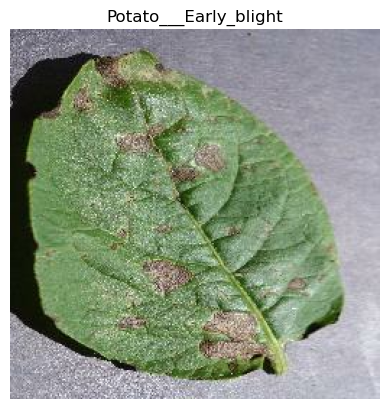

In [11]:
import matplotlib.pyplot as plt
for image_batch, label_batch in train_ds.take(1):  
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names1[label_batch[0]])
    plt.axis("off")

In [12]:
import matplotlib.pyplot as plt

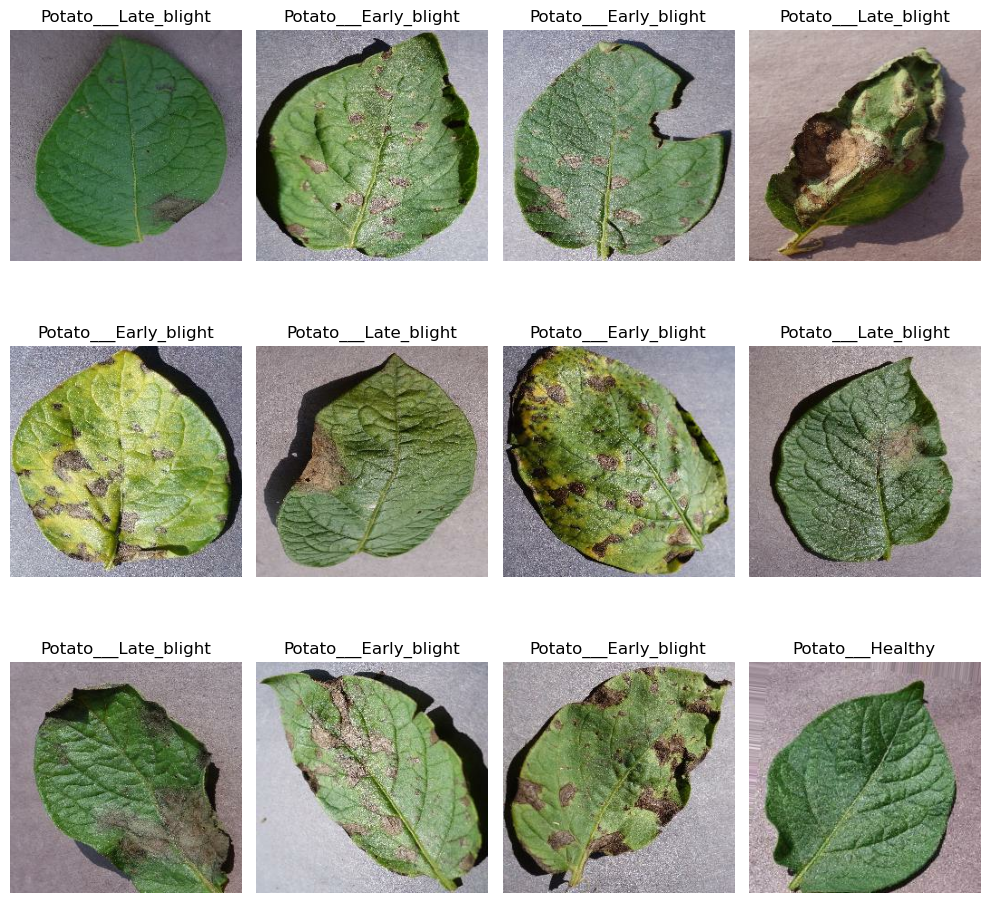

In [13]:
plt.figure(figsize = (10,10))
num_images = 20
for images, label in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names1[label[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    

In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage\Valid",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True
)

Found 300 files belonging to 3 classes.


In [15]:
class_names = val_ds.class_names


In [16]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage\Test",
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True
)

Found 300 files belonging to 3 classes.


In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
Data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    Data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
    ])

model.build(input_shape = input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20


29/29 [==============================] - 36s 964ms/step - loss: 1.1041 - accuracy: 0.3311 - val_loss: 1.0843 - val_accuracy: 0.3333
Epoch 2/20
29/29 [==============================] - 30s 1s/step - loss: 1.0866 - accuracy: 0.4100 - val_loss: 1.0882 - val_accuracy: 0.3333
Epoch 3/20
29/29 [==============================] - 34s 1s/step - loss: 1.0448 - accuracy: 0.4311 - val_loss: 0.9170 - val_accuracy: 0.5933
Epoch 4/20
29/29 [==============================] - 34s 1s/step - loss: 0.7515 - accuracy: 0.6267 - val_loss: 0.6018 - val_accuracy: 0.7233
Epoch 5/20
29/29 [==============================] - 34s 1s/step - loss: 0.6614 - accuracy: 0.7122 - val_loss: 1.0500 - val_accuracy: 0.4967
Epoch 6/20
29/29 [==============================] - 35s 1s/step - loss: 0.5695 - accuracy: 0.7589 - val_loss: 0.3983 - val_accuracy: 0.8333
Epoch 7/20
29/29 [==============================] - 32s 1s/step - loss: 0.3891 - accuracy: 0.8389 - val_loss: 0.3520 - val_accuracy: 0.8500
Epoch 8/20
29/2

In [24]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")

10/10 [==============================] - 3s 213ms/step - loss: 0.2104 - accuracy: 0.9167
Test accuracy: 0.9167


In [25]:
model.save("model.h5")

C:\Users\yashi_l2ryogo\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 271ms/step
Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       0.87      0.95      0.91       100
     Potato___Healthy       0.96      0.98      0.97       100
 Potato___Late_blight       0.92      0.82      0.87       100

             accuracy                           0.92       300
            macro avg       0.92      0.92      0.92       300
         weighted avg       0.92      0.92      0.92       300



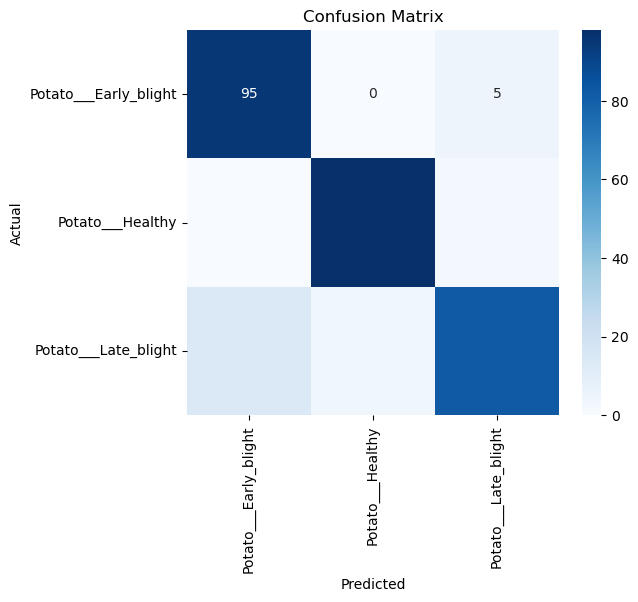

In [26]:
# Predict on test set
import numpy as np

y_true = []
y_pred = []
for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 29}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.1040685176849365,
 1.0865691900253296,
 1.0447661876678467,
 0.7515057325363159,
 0.6613745093345642]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

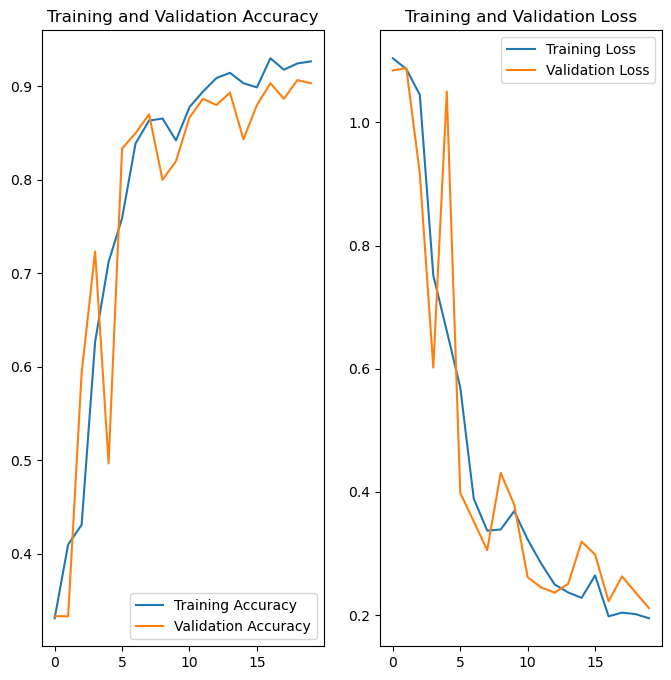

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
model = tf.keras.models.load_model('model.h5')

first image to predict
actual label: Potato___Healthy
1/1 [==============================] - 1s 615ms/step
predicted label: Potato___Healthy


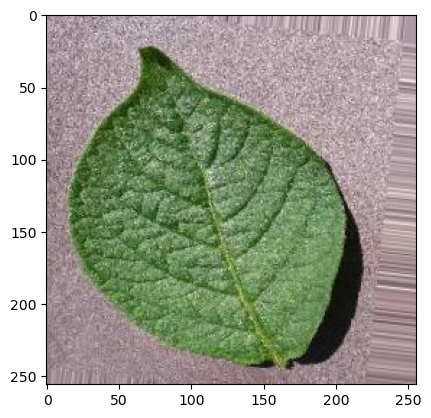

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 51ms/step


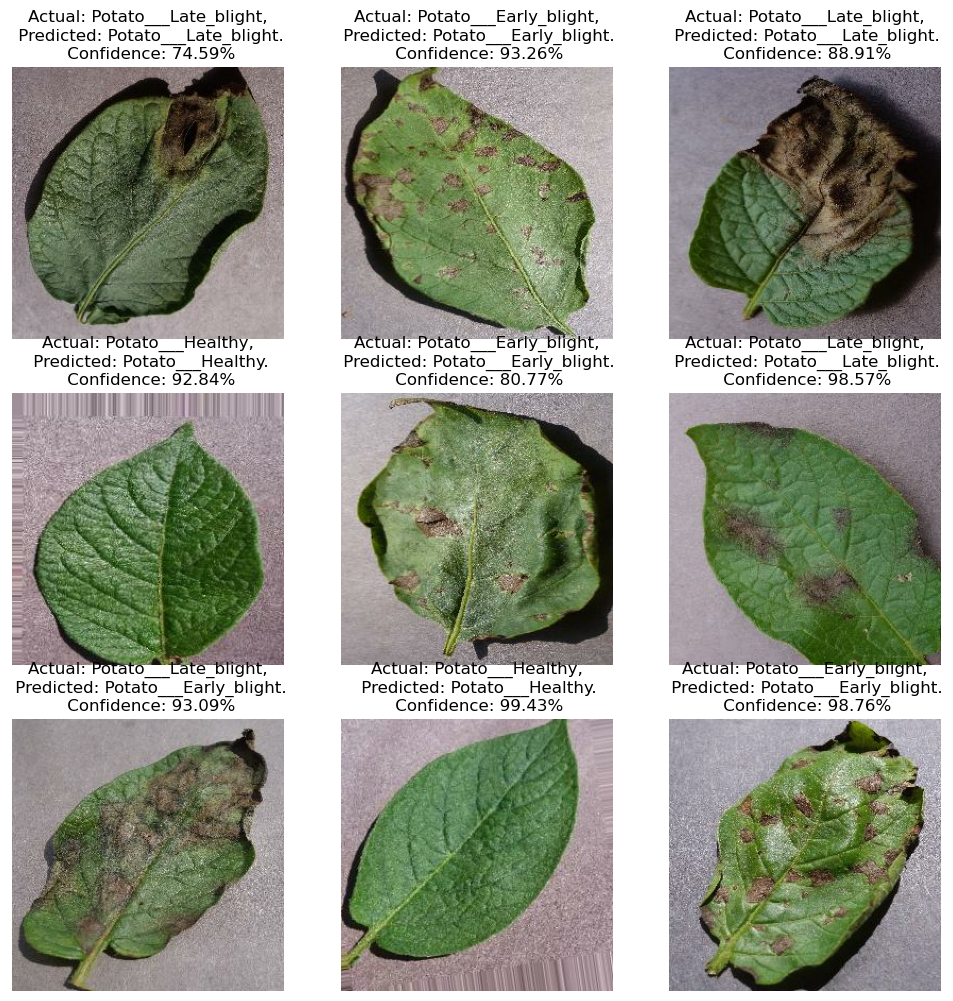

In [34]:

plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import os
model_dir = r"C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage\models"

# Find next version number
existing = [int(i) for i in os.listdir(model_dir) if i.isdigit()]
model_version = max(existing + [0]) + 1

save_path = os.path.join(model_dir, str(model_version))
os.makedirs(save_path, exist_ok=True)

model.save(save_path)

print(f"Model saved at: {save_path}")


INFO:tensorflow:Assets written to: C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage\models\3\assets


INFO:tensorflow:Assets written to: C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage\models\3\assets


Model saved at: C:\Users\yashi_l2ryogo\OneDrive\Desktop\Crop disease classification\PlantVillage\models\3
